In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2



In [22]:
import PIL

# data preprocessing

In [2]:
from datasets import load_dataset

c:\Users\vivek\anaconda3\envs\TF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("mattmdjaga/human_parsing_dataset")


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'mask'],
        num_rows: 17706
    })
})

In [5]:
label_map={"0": "Background", "1": "Hat", "2": "Hair", "3": "Sunglasses", "4": "Upper-clothes", "5": "Skirt", "6": "Pants", "7": "Dress", "8": "Belt", "9": "Left-shoe", "10": "Right-shoe", "11": "Face", "12": "Left-leg", "13": "Right-leg", "14": "Left-arm", "15": "Right-arm", "16": "Bag", "17": "Scarf"}
print(len(label_map))
COLOR_MAP=[k for k in range(18)]



18


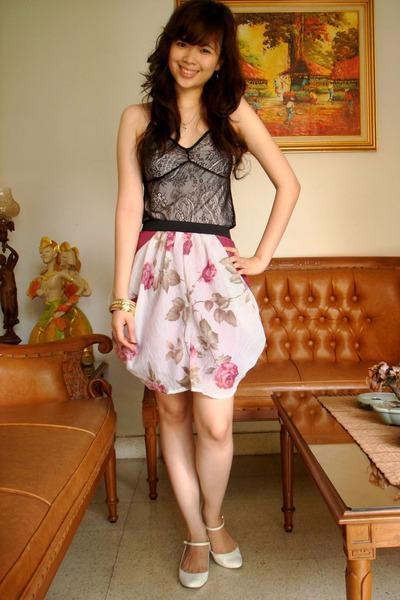

In [6]:
dataset["train"][1]["image"]

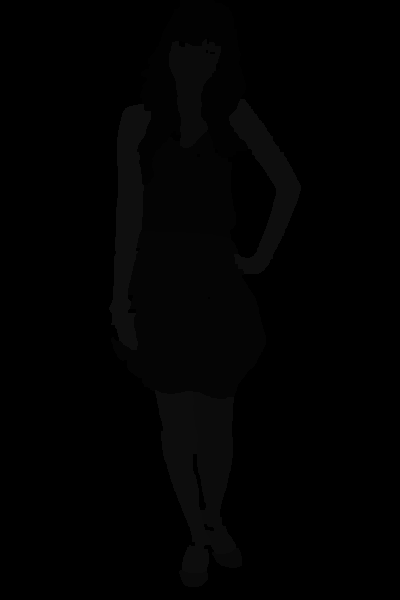

In [7]:
dataset["train"][1]["mask"]

In [8]:
img_list=[]
mask_list=[]
for i in range(1000):
    img_list.append(dataset["train"][i]["image"])
    mask_list.append(dataset["train"][i]["mask"])


In [9]:
len(img_list)

1000

In [10]:
train_x,train_y=img_list[0:800],mask_list[0:800]
test_x,test_y  =img_list[800],mask_list[800]

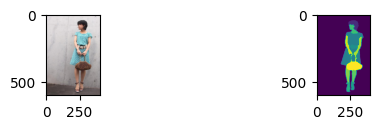

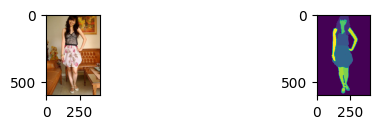

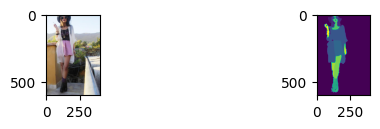

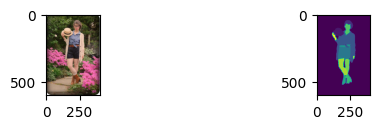

In [11]:
c=0
for i in range(0,8,2):
    ax=plt.subplot(4,2,i+1)
    plt.imshow(img_list[c])
    ax=plt.subplot(4,2,i+2)
    plt.imshow(mask_list[c])
    plt.show()
    c+=1


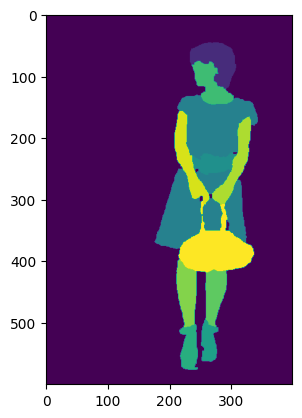

In [12]:
plt.imshow(mask_list[0])

In [13]:
def readImg(x):
    """here x is an np array not an filepath"""
    cv2.imwrite("img1.png",x)

In [14]:
readImg(np.array(img_list[1]))

In [50]:
#converts a given mask image into binary mask

def readMask(x):
    #x is an np array not a mask_list object


    """Mask processing"""
    output=[]
    for  color in COLOR_MAP:
        color=np.array(0)
        cmap=np.equal(x,color)
        cv2.imwrite("cmap.png",cmap*255)
        break
    #     output.append(cmap)

    # output=np.stack(output, axis=-1)
    # output=output.astype(np.uint8)
    # """the output file has all the masked prcessed from class 1 to 17"""
    # return output


        

In [54]:
#converts a given mask image into binary mask for all classes and save it

def readMask(x):
    #x is an np array not a mask_list object


    """Mask processing"""
    output=[]
    for  i, color in enumerate(COLOR_MAP):
        color=np.array(color)
        cmap=np.equal(x,color)
        cv2.imwrite(f"cmap_{i}.png",cmap*255)
        
    #     output.append(cmap)

    # output=np.stack(output, axis=-1)
    # output=output.astype(np.uint8)
    # """the output file has all the masked prcessed from class 1 to 17"""
    # return output

In [56]:
#converts a given mask image into binary mask for all classes and save it

def readMask(x):
    #x is an np array not a mask_list object
    #x is an np array, after modifing the code it will be path to multiclass normalized mask
    
    """Mask processing"""
    output=[]
    for  color in COLOR_MAP:
        color=np.array(color)
        cmap=np.equal(x,color)
        output.append(cmap)
    #stacking the output file
    output=np.stack(output, axis=-1)
    #above stack is boolen, we convert it to integer
    output=output.astype(np.uint8)
    return output

In [57]:
output=readMask(mask_list[0])

In [59]:
c=0
for out in output:
    cv2.imwrite(f"cmap_{c}.jpg",out*255)
    c+=1

In [ ]:
# sfasf

In [18]:
img1=np.array(np.array(img_list[0]))

In [23]:
from PIL import Image

In [27]:
img_list[0].save("out.jpg","jpeg")

In [25]:
im=Image.open("img1.png")
print(type(im))
# im.show()

<class 'PIL.PngImagePlugin.PngImageFile'>


# image conversion process

# Image processing- fetching data using api and saving it localy

In [64]:
def build_image_mask_dataset(img_list,mask_list):    
    def save_img(img_list):
        for k in range(1000):
            img_list[k].save(f"D:\\work\\reserch work\\shivgami mam\\dataset\\train\\input\\img_{k}.jpg","jpeg")

    def save_mask(mask_list):
        for k in range(1000):
            mask_list[k].save(f"D:\\work\\reserch work\\shivgami mam\\dataset\\train\\Categories\\img_{k}.jpg","jpeg")

    save_img(img_list)
    save_mask(mask_list)         

build_image_mask_dataset(img_list,mask_list)      

# image conversion process - end

In [139]:
def preprocess(x,y):
    """
    x-represent the image
    y-represent the mask
    """
    def get_image_mask(x,y):
        return readImg(x), readMask(y)

    image,mask=tf.numpy_function(get_image_mask, [x,y], [tf.float32, tf.uint8])
    image.set_shape([600,400],3)
    mask.set_shape([600,400,18])
    """600*400 image size and 18 is the number of output classes"""
    return image,mask

In [96]:
preprocess(np.array(img_list[0]),np.array(mask_list[0]))

TypeError: Can't convert object to 'str' for 'filename'

In [86]:
def tf_dataset(x, y, batch=8):
    dataset=tf.data.Dataset.from_tensor_slices((x,y))
    dataset=dataset.shuffle(buffer_size=5000)
    dataset=dataset.map(preprocess)
    dataset=dataset.batch(batch)
    dataset=dataset.prefetch(2)
    return dataset

In [94]:
"""dataset pipeline"""
train_dataset=tf_dataset(train_x,train_y,batch=4)
test_dataset=tf_dataset(test_x,test_y,batch=4)

ValueError: Attempt to convert a value (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x195FF551460>) with an unsupported type (<class 'PIL.JpegImagePlugin.JpegImageFile'>) to a Tensor.

In [82]:
tempimg=np.array(mask_list[0],dtype=np.float32)
readMask(tempimg)

In [57]:
b=np.array(1)

In [58]:
np.equal(tempimg,b)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

numpy.ndarray

0
2
11
7
15
14
8
16
13
12
9
10


# trash code


In [53]:
def build_fcn_vgg16(input_shape):
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Taking only the convolutional part of VGG16
    conv_layers = vgg16.get_layer('block5_conv3').output
    
    # Adding fully convolutional layers
    conv6 = Conv2D(4096, (7, 7), activation='relu', padding='same', name='conv6')(conv_layers)
    conv7 = Conv2D(4096, (1, 1), activation='relu', padding='same', name='conv7')(conv6)
    conv8 = Conv2D(18, (1, 1), activation='softmax', padding='same', name='conv8')(conv7)
    
    # Upsampling
    upsampled = UpSampling2D(size=(32, 32), interpolation='bilinear')(conv8)
    
    model = Model(inputs=vgg16.input, outputs=upsampled)
    return model

In [54]:
def build_phpc(input_shape):
    # Image-level parsing network
    image_level_model = build_fcn_vgg16(input_shape)
    
    # Head-parsing sub-network
    head_input = tf.keras.layers.Input(shape=(input_shape[0]*2, input_shape[1]*2, input_shape[2]))
    head_model = build_fcn_vgg16((input_shape[0]*2, input_shape[1]*2, input_shape[2]))
    
    # Body-parsing sub-network
    body_input = tf.keras.layers.Input(shape=(input_shape[0]*2, input_shape[1]*2, input_shape[2]))
    body_model = build_fcn_vgg16((input_shape[0]*2, input_shape[1]*2, input_shape[2]))
    
    # Combining all the networks
    combined = Concatenate()([image_level_model.output, head_model.output, body_model.output])
    final_output = Conv2D(18, (1, 1), activation='softmax', padding='same')(combined)
    
    model = Model(inputs=[image_level_model.input, head_input, body_input], outputs=final_output)
    return model


In [55]:

input_shape = (384, 384, 3)
model = build_phpc(input_shape)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]